

# PAGINA DEL MEF
## https://www.mef.gob.pe/es/seguimiento-de-la-ejecucion-presupuestal-consulta-amigable

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
url='https://www.mef.gob.pe/es/seguimiento-de-la-ejecucion-presupuestal-consulta-amigable'
r = requests.get(url)
r.status_code

200

In [4]:
options = webdriver.ChromeOptions()
options.add_argument('--incognito')
driver = webdriver.Chrome(executable_path = 'chromedriver.exe', options = options)
driver.implicitly_wait(30)
driver.get(url)

In [5]:
gastos = driver.find_elements_by_xpath('//div[@class="texto_linkeables"]')
gastos

[<selenium.webdriver.remote.webelement.WebElement (session="4bf363370b61b7095ce870d4c1684c08", element="66a150e6-5693-4b00-b40e-479b09aca279")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4bf363370b61b7095ce870d4c1684c08", element="b44ae0ea-a04a-44c5-9513-730f9eeb26bd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4bf363370b61b7095ce870d4c1684c08", element="9ffa3e1d-2cec-4f0b-85e4-437c9edda782")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4bf363370b61b7095ce870d4c1684c08", element="18b0bf07-a70c-49ac-bb3c-07ea484d1cb7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4bf363370b61b7095ce870d4c1684c08", element="8a171d50-4f9a-4dc5-9582-3f22f61fff03")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4bf363370b61b7095ce870d4c1684c08", element="03f3be21-eb4f-4c94-8359-939f0eda6560")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4bf363370b61b7095ce870d4c1684c08", element="721eb4ea-4fd4-4200-9992-6c

In [6]:
len(gastos)

15

In [ ]:
gastos[-1:]

In [7]:
import pandas as pd

### Covid

Consulta Amigable COVID-19
http://apps5.mineco.gob.pe/coronavirus/Navegador/default.aspx
30 detectados



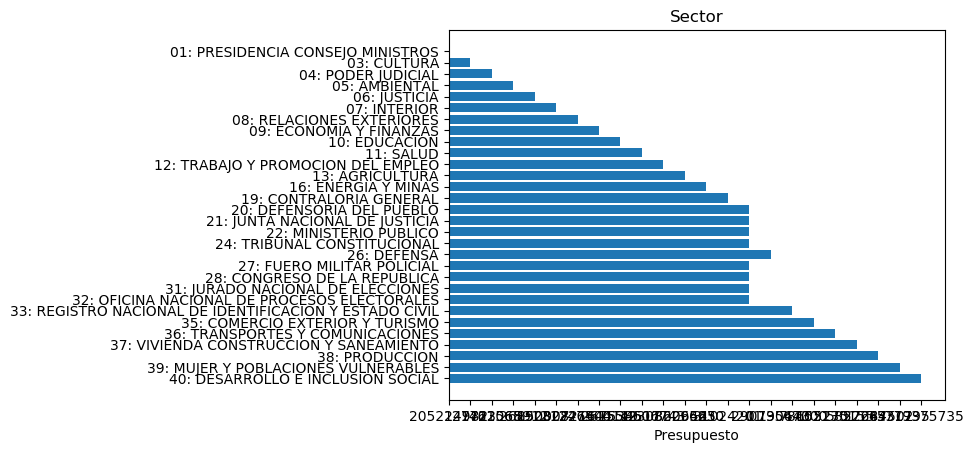

In [8]:
driver2 = webdriver.Chrome(executable_path = 'chromedriver.exe', options = options)
driver2.implicitly_wait(30)

for gasto in gastos[5:6]:
    #print(curso)
    nombre = gasto.find_element_by_xpath('.//a').text    
    url_gasto = gasto.find_element_by_xpath('.//a').get_attribute('href')
    
    print(nombre)
    print(url_gasto)
    driver2.get(url_gasto)
    driver2.switch_to.frame(0)
    
    #botones = driver2.find_element_by_xpath('//div[@class="DimButtons"]')
    
    driver2.find_element_by_xpath('//input[@value="Nivel de Gobierno"]').click()
    driver2.find_element_by_xpath('//tr[@id="tr0"]').click()
    driver2.find_element_by_xpath('//input[@value="Sector"]').click()
    
    filas = driver2.find_elements_by_xpath('//tr[@onmouseover="tr_over(this)"]')
    print(len(filas),'detectados')
    
    table = []
    for fila in filas:
        values = fila.find_elements_by_xpath('.//td')
        td =  []
        for value_i in values:
            td.append(value_i.text)
        table.append(td)
    data = pd.DataFrame(table)
    try: 
        data[3] = data[3].str.replace(',', '')
        data[3] = data[3].str.replace(' ', '')
    except: pass
    
    try: data[3] = data[3].astype(int)
    except: pass
    
    etiqueta = data[1].values
    presupuesto = data[3].values    
    
    print('')
    
    plt.rcdefaults()
    fig, ax = plt.subplots()

    # Example data
    y_pos = np.arange(len(etiqueta))

    ax.barh(y_pos, presupuesto, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(etiqueta)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Presupuesto')
    ax.set_title('Sector')

    plt.show()
    
driver2.close()

In [9]:
data

0                                                  1  2           3  \
0                     01: PRESIDENCIA CONSEJO MINISTROS  0   205224982   
1                                           03: CULTURA  0      121713   
2                                    04: PODER JUDICIAL  0     7461565   
3                                         05: AMBIENTAL  0    22068912   
4                                          06: JUSTICIA  0    26850007   
5                                          07: INTERIOR  0   192828216   
6                             08: RELACIONES EXTERIORES  0    31247500   
7                               09: ECONOMIA Y FINANZAS  0   226444149   
8                                         10: EDUCACION  0   267534517   
9                                             11: SALUD  0  1558606743   
10                   12: TRABAJO Y PROMOCION DEL EMPLEO  0  1230860644   
11                                      13: AGRICULTURA  0     8229565   
12                                  16: ENERGIA Y MINAS  0        6230   
13                              19: CONTRALORIA GENERAL  0    31024201   
14                            20: DEFENSORIA DEL PUEBLO  0           0   
15                       21: JUNTA NACIONAL DE JUSTICIA  0           0   
16                               22: MINISTERIO PUBLICO  0           0   
17                          24: TRIBUNAL CONSTITUCIONAL  0           0   
18                                          26: DEFENSA  0   290790643   
19                           27: FUERO MILITAR POLICIAL  0           0   
20                         28: CONGRESO DE LA REPUBLICA  0           0   
21                    31: JURADO NACIONAL DE ELECCIONES  0           0   
22         32: OFICINA NACIONAL DE PROCESOS ELECTORALES  0           0   
23    33: REGISTRO NACIONAL DE IDENTIFICACION Y ESTA...  0    13547000   
24                      35: COMERCIO EXTERIOR Y TURISMO  0    78655270   
25                     36: TRANSPORTES Y COMUNICACIONES  0   102135155   
26              37: VIVIENDA CONSTRUCCION Y SANEAMIENTO  0     5852264   
27                                       38: PRODUCCION  0    27687502   
28                  39: MUJER Y POBLACIONES VULNERABLES  0     4531795   
29                    40: DESARROLLO E INCLUSION SOCIAL  0  3779375735   

                4              5              6              7              8  \
0     138,745,166    125,899,529    125,787,681     68,887,849     68,476,921   
1         113,508        113,508        113,508         94,462         35,008   
2       6,834,438      2,255,670      2,169,064        801,363        588,508   
3       8,417,467      2,460,050      2,453,050      1,185,799      1,185,799   
4      17,572,762     15,332,824     14,473,733     10,158,695      9,565,753   
5     188,733,858    168,114,473    159,581,530    154,336,845    149,293,740   
6      25,421,752     24,641,086     24,334,244     24,334,244     24,197,165   
7     162,635,085    162,635,085    162,635,085     32,902,389     32,584,459   
8      23,601,243     15,511,477      4,887,513      3,408,699      2,160,884   
9   1,123,523,034  1,048,885,256    901,849,755    484,696,552    426,707,194   
10  1,225,434,802  1,186,920,699  1,186,911,699  1,181,373,401  1,181,367,401   
11      7,540,543      7,248,688      7,112,752      6,438,874      6,370,459   
12              0              0              0              0              0   
13     14,902,477     12,772,358      7,364,366      1,447,201      1,379,906   
14              0              0              0              0              0   
15              0              0              0              0              0   
16              0              0              0              0              0   
17              0              0              0              0              0   
18    177,485,939    142,381,790    138,898,312     77,059,710     66,532,398   
19              0              0              0              0              0   
20     

### Los otros

Consultar el Gasto Presupuestal (Actualización Diaria)
http://apps5.mineco.gob.pe/transparencia/
30 detectados



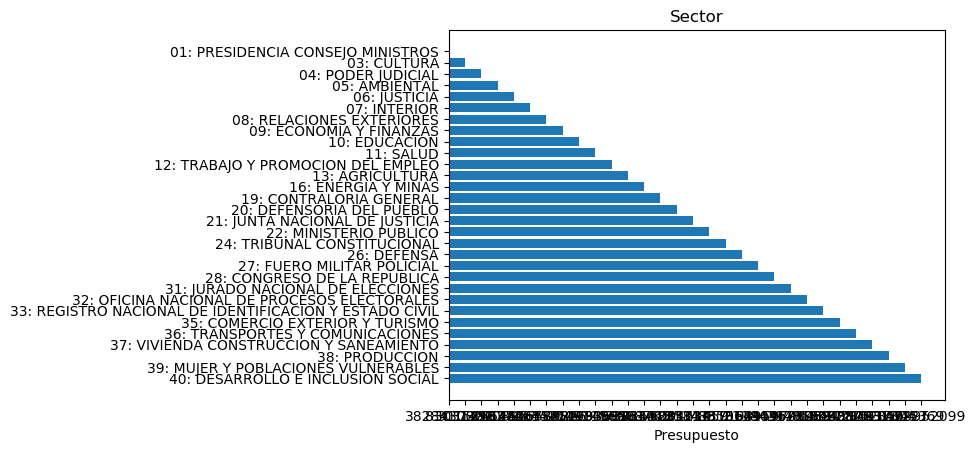

Consultar el Gasto Presupuestal (Actualización Mensual)
http://apps5.mineco.gob.pe/transparencia/mensual/
30 detectados



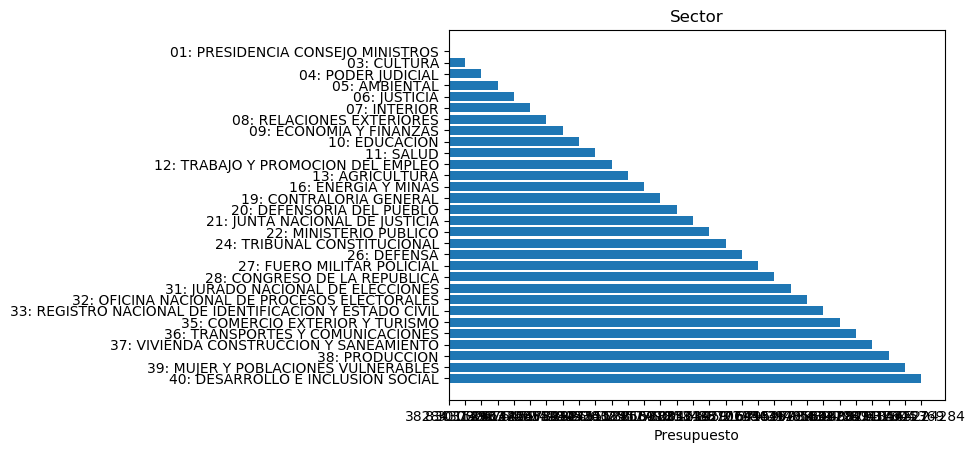

Consultar el Ingreso Presupuestal (Actualización Diaria)
http://apps5.mineco.gob.pe/transparenciaingresos/
30 detectados



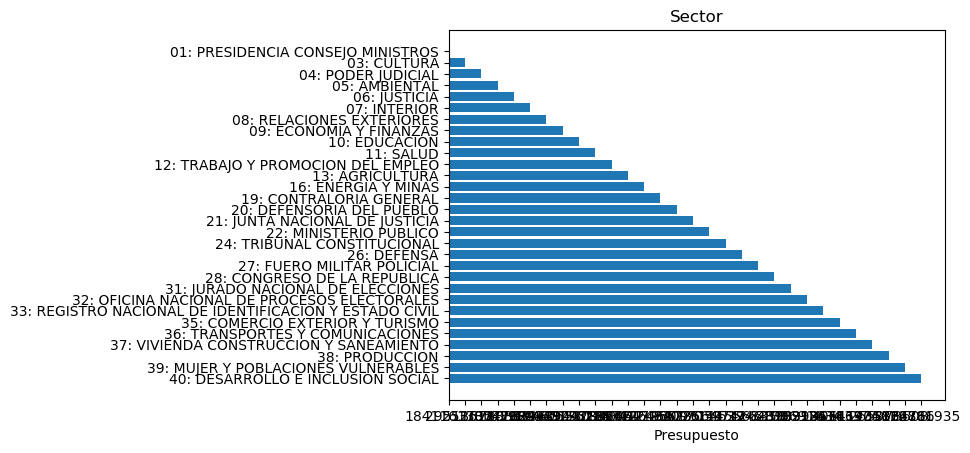

Consultar el Ingreso Presupuestal (Actualización Mensual)
http://apps5.mineco.gob.pe/transparenciaingresos/mensual/
30 detectados



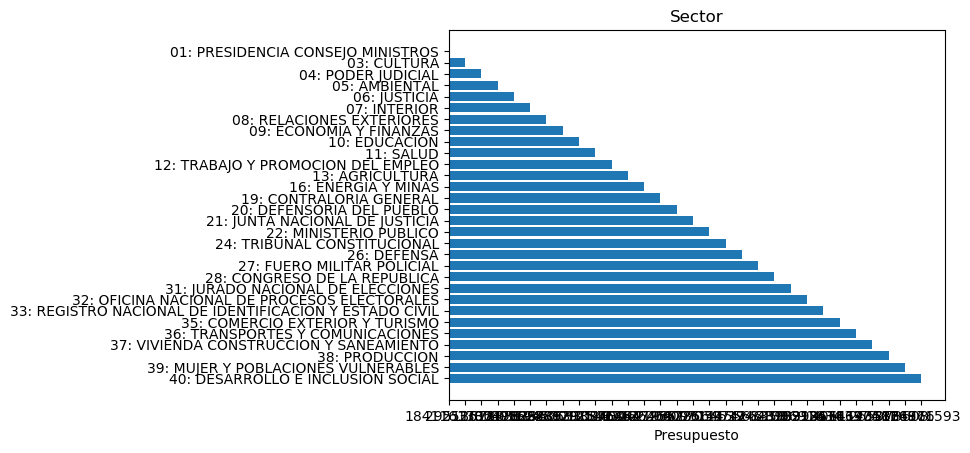

Consulta de Seguimiento de Proyectos de Inversión (actualización diaria)
http://apps5.mineco.gob.pe/bingos/seguimiento_pi/
28 detectados



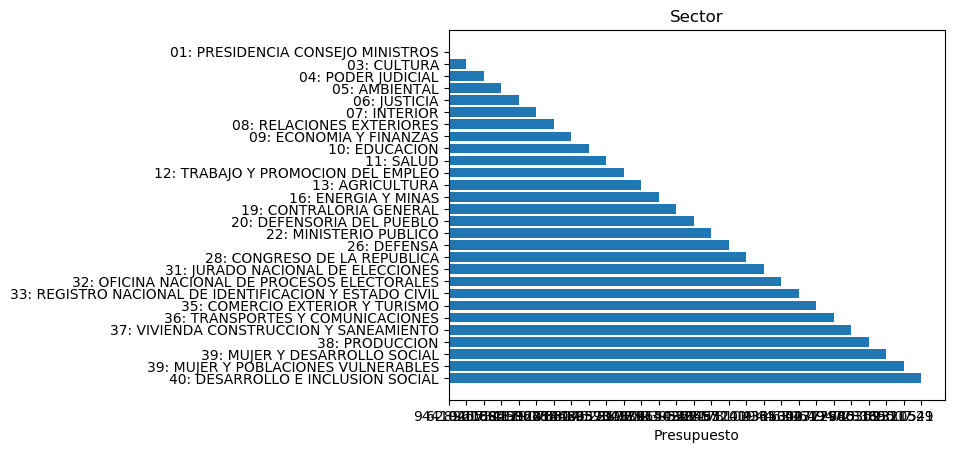

Consulta Amigable COVID-19
http://apps5.mineco.gob.pe/coronavirus/Navegador/default.aspx
30 detectados



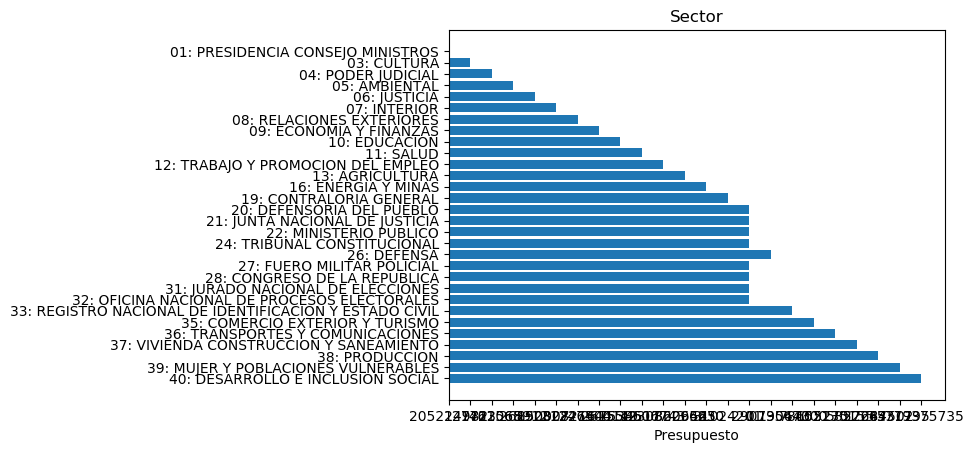

Consultar el Gasto del Fondo para Intervenciones ante la Ocurrencia de Desastres Naturales - FONDES
http://apps5.mineco.gob.pe/seguimiento_fondes/Navegador/default.aspx
9 detectados



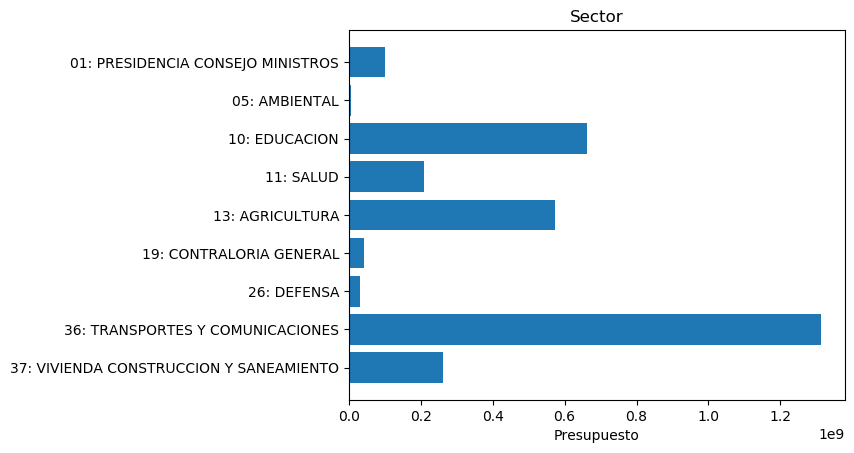

Consulta de gastos de la Adaptación y Mitigación ante el Cambio Climático
http://apps5.mineco.gob.pe/cambioclimatico/Navegador/default.aspx
4 detectados



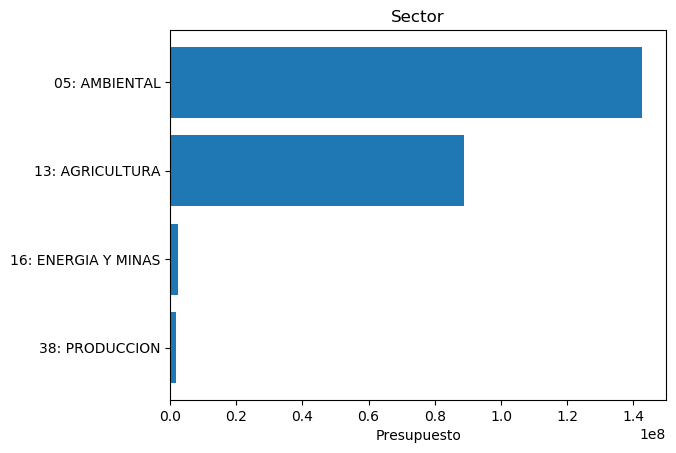

Consulta del Gasto Presupuestal de los Organismo Públicos Descentralizados - Regionales y Municipales
http://apps5.mineco.gob.pe/opds/Navegador/default.aspx
Consulta del ingreso Presupuestal de los Organismo Públicos Descentralizados - Regionales y Municipales
http://apps5.mineco.gob.pe/opdsingresos/Navegador/default.aspx
Consulta del Gasto Presupuestal de las Entidades de Tratamiento Empresarial - ETES
http://apps5.mineco.gob.pe/etesgasto/
Consulta del Ingreso Presupuestal de las Entidades de Tratamiento Empresarial - ETES
http://apps5.mineco.gob.pe/etesingreso/
Consulta de Reportes Trimestrales del Gasto Departamental en Actividades y Proyectos
http://apps5.mineco.gob.pe/transparencia/Reportes/Default.aspx
Consulta el Gasto de Mantenimiento diario
http://apps5.mineco.gob.pe/bingos/mantenimiento/
30 detectados



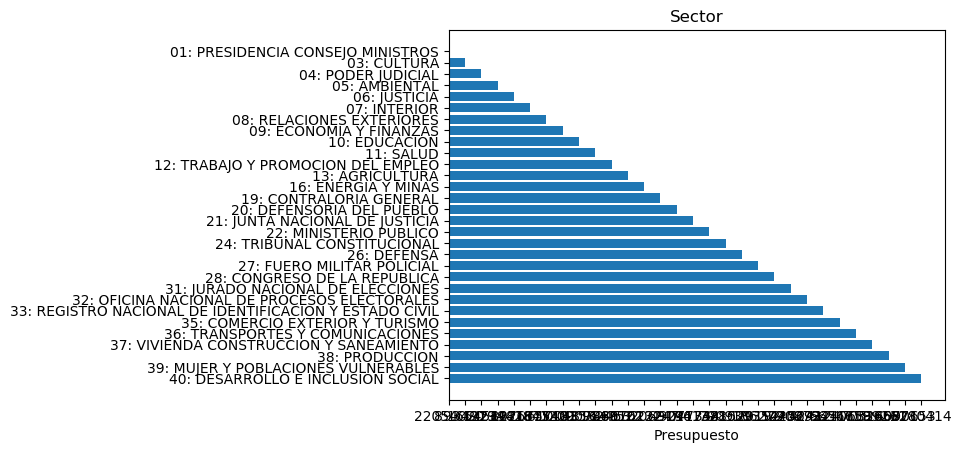

Consulta de Intervenciones período de lluvias 2015-2016 y Fenómeno El Niño
http://apps5.mineco.gob.pe/fenomenonino/
10 detectados



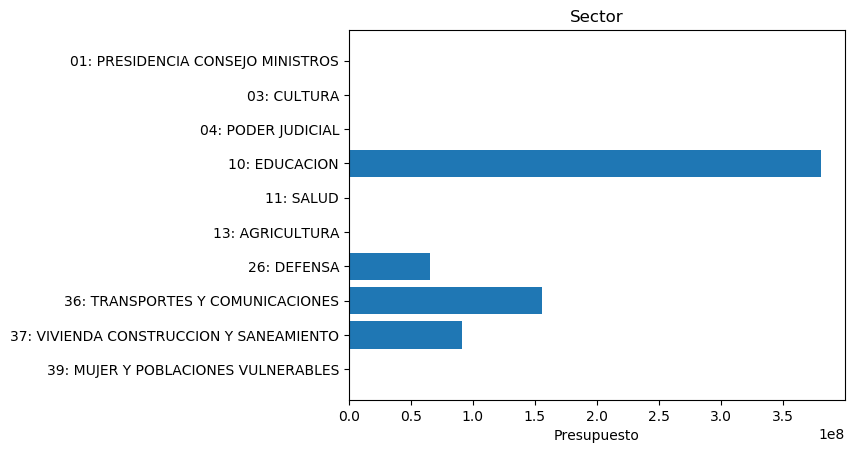

In [10]:
driver2 = webdriver.Chrome(executable_path = 'chromedriver.exe', options = options)
driver2.implicitly_wait(30)

for gasto in gastos:
    #print(curso)
    nombre = gasto.find_element_by_xpath('.//a').text    
    url_gasto = gasto.find_element_by_xpath('.//a').get_attribute('href')
    
    print(nombre)
    print(url_gasto)
    driver2.get(url_gasto)
    driver2.switch_to.frame(0)
    
    #botones = driver2.find_element_by_xpath('//div[@class="DimButtons"]')
    try:
        driver2.find_element_by_xpath('//input[@value="Nivel de Gobierno"]').click()
        driver2.find_element_by_xpath('//tr[@id="tr0"]').click()
        driver2.find_element_by_xpath('//input[@value="Sector"]').click()

        filas = driver2.find_elements_by_xpath('//tr[@onmouseover="tr_over(this)"]')
        print(len(filas),'detectados')

        table = []
        for fila in filas:
            values = fila.find_elements_by_xpath('.//td')
            td =  []
            for value_i in values:
                td.append(value_i.text)
            table.append(td)
        data = pd.DataFrame(table)
        try: 
            data[3] = data[3].str.replace(',', '')
            data[3] = data[3].str.replace(' ', '')
        except: pass

        try: data[3] = data[3].astype(int)
        except: pass

        etiqueta = data[1].values
        presupuesto = data[3].values    

        print('')

        plt.rcdefaults()
        fig, ax = plt.subplots()

        # Example data
        y_pos = np.arange(len(etiqueta))

        ax.barh(y_pos, presupuesto, align='center')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(etiqueta)
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel('Presupuesto')
        ax.set_title('Sector')

        plt.show()
    except: pass 
driver2.close()

In [ ]:
driver.close()